In [1]:
# importing libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#checking total rows and cols in dataset
df.shape

(9240, 37)

In [ ]:
# The dataset has:

9240 rows
37 columns

In [ ]:
# Data Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
## check for duplicates

In [12]:
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [13]:
# No duplicate values in Prospect ID

In [15]:
sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [16]:
# Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

In [17]:
# EXPLORATORY DATA ANALYSIS

In [18]:
# Data Cleaning

In [19]:
# checking null values in each rows

In [22]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [23]:
#checking percentage of null values in each column

In [28]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [29]:
#dropping cols with more than 45% missing values

In [33]:
cols=df.columns

In [34]:

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [35]:
# checking null values percentage

In [36]:
round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [37]:
# Categorical Attributes Analysis

In [38]:
# checking value counts of Country column

In [39]:
df['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

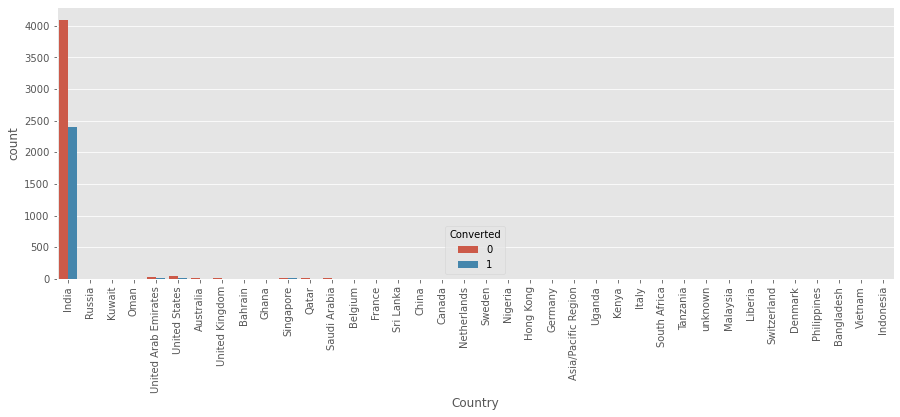

In [41]:
#### plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
# India is the most common occurence among the non-missing values we can impute all missing values with India

In [44]:
df['Country'] = df['Country'].replace(np.nan,'India')

In [45]:
#plotting spread of Country columnn after replacing NaN values

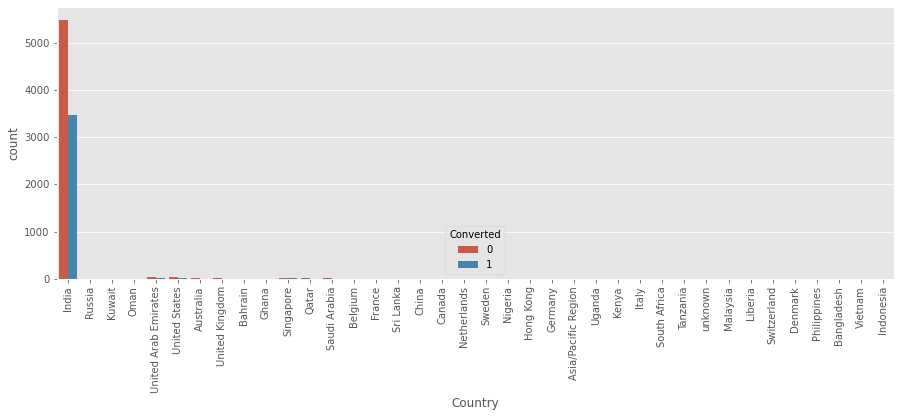

In [46]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
#  the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [48]:
#creating a list of columns to be droppped

In [49]:
cols_to_drop=['Country']

In [50]:
#checking value counts of "City" column

In [55]:
df['City'].value_counts(dropna=False)

Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [57]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [58]:
#plotting spread of City columnn after replacing NaN values

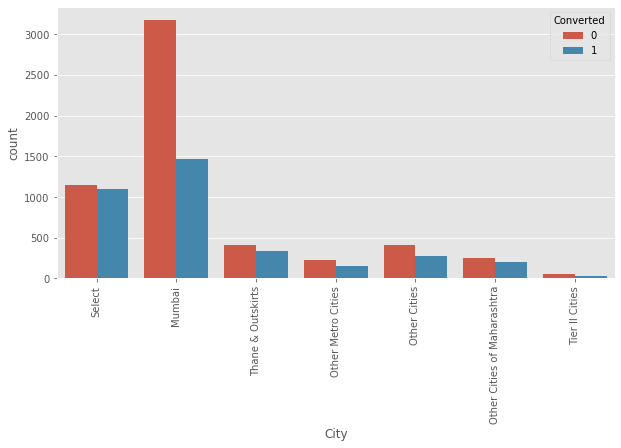

In [59]:
plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [60]:
#checking value counts of Specialization column

In [62]:
df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [63]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

In [64]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

In [65]:
# plotting spread of Specialization columnn 

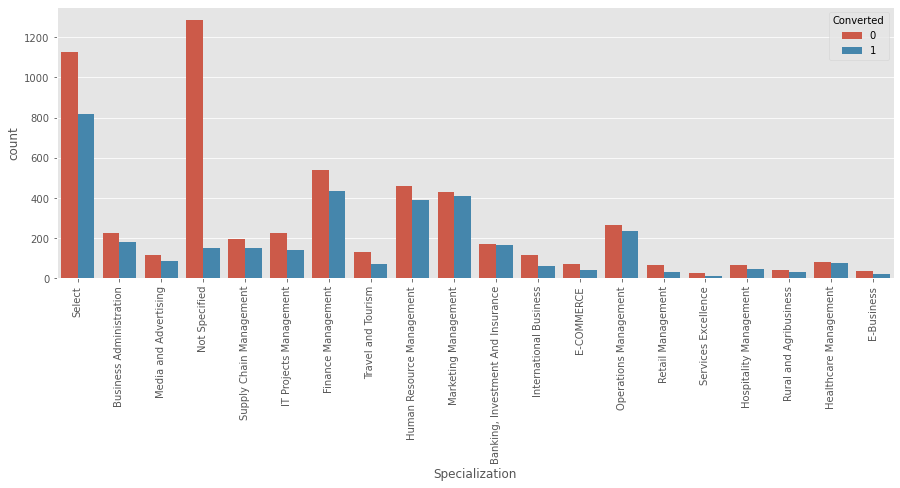

In [66]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [67]:
# have seen that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [68]:
# visualizing count of Variable based on Converted value

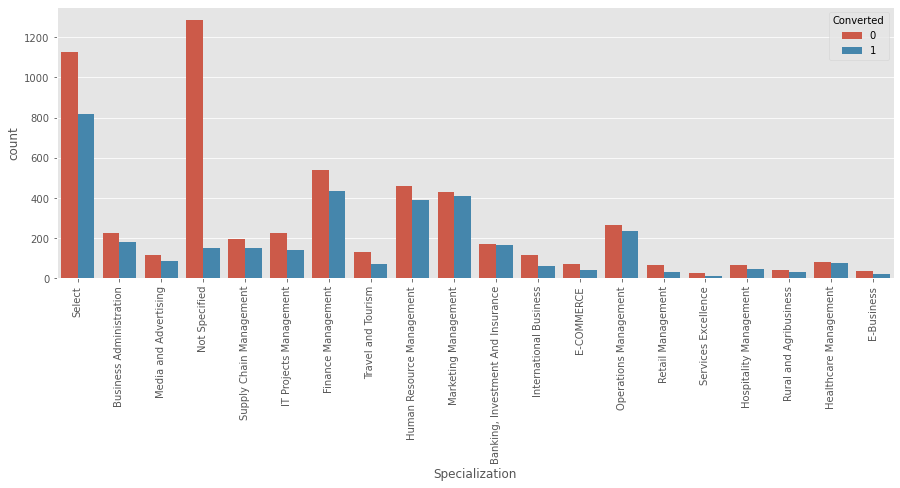

In [69]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [70]:
# What is your current occupation


In [74]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [75]:
# Imputing Nan values with mode "Unemployed"

In [76]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [77]:
# checking count of values

In [78]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [79]:
# visualizing count of Variable based on Converted value

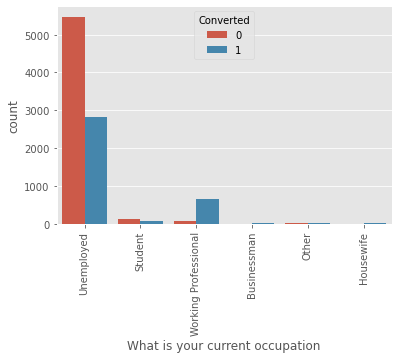

In [81]:
s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [82]:
## checking value counts

In [83]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [84]:
## replacing Nan values with Mode "Better Career Prospects"

In [85]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [86]:
## visualizing count of Variable based on Converted value

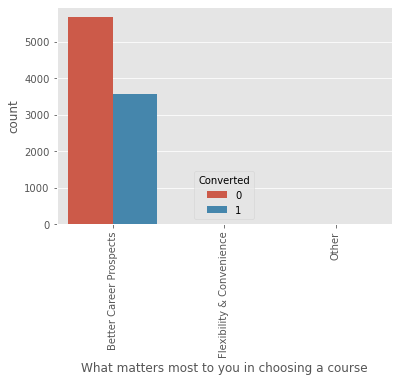

In [87]:
s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [88]:
#checking value counts of variable

In [89]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [90]:
# Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List

In [91]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [92]:
# checking value counts of Tag variable

In [93]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [94]:
## Replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

In [95]:
### Visualizing count of Variable based on Converted value

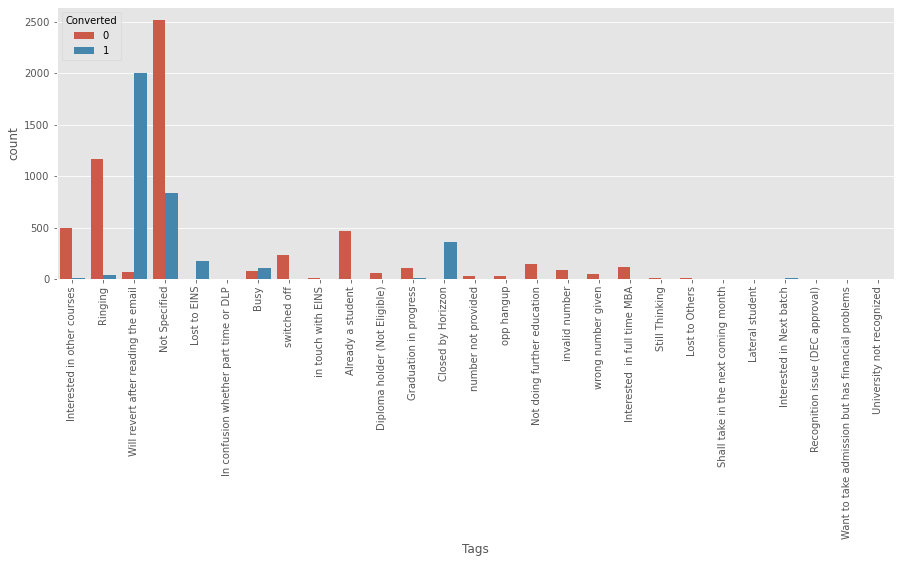

In [96]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [98]:
## checking percentage of missing values

In [102]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [103]:
#checking value counts of Lead Source column

In [104]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [105]:
## visualizing count of Variable based on Converted value

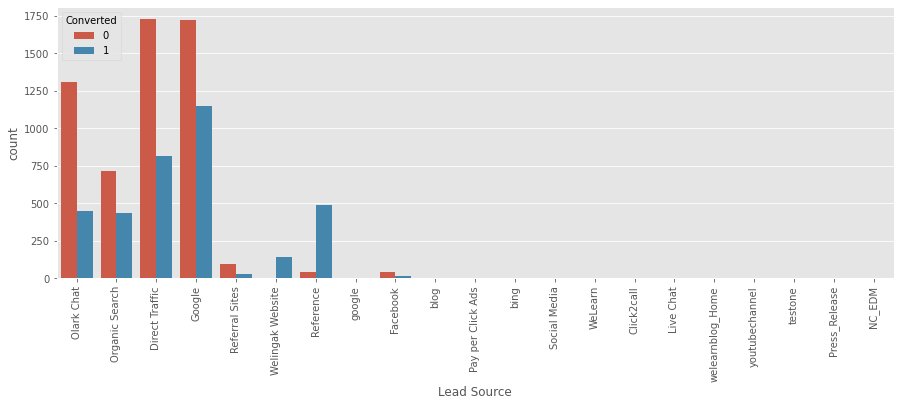

In [106]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# Inference
# Maximum number of leads are generated by Google and Direct traffic.
# Conversion Rate of reference leads and leads through welingak website is high.

In [107]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [108]:
## replacing Nan Values and combining low frequency values

In [109]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [110]:
#Check the Null Values in All Columns:

In [111]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [112]:
## Drop all rows which have Nan Values. And the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [113]:
##Checking percentage of Null Values in All Columns

In [114]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [115]:
## Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    3624
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

In [116]:
#visualizing count of Variable based on Converted value

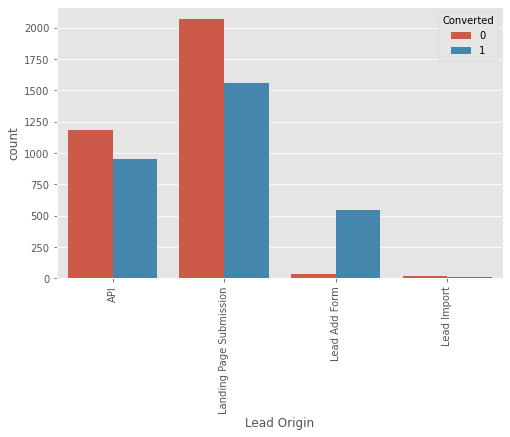

In [117]:
plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#comments
# API and Landing Page Submission bring higher number of leads as well as conversion.
# Lead Add Form has a very high conversion rate but count of leads are not very high.
# In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [118]:
## Do Not Email & Do Not Call
## visualizing count of Variable based on Converted value

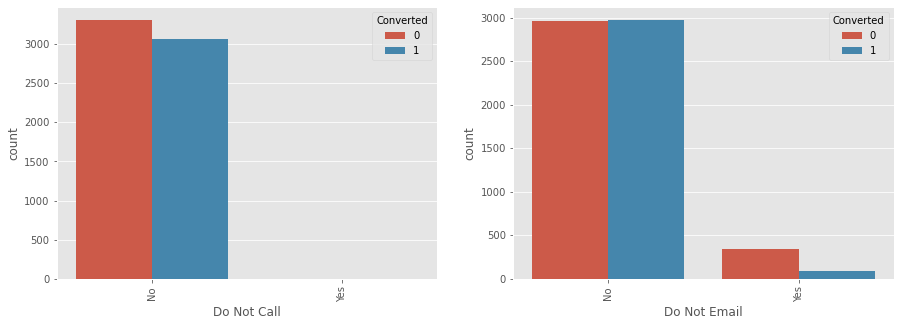

In [119]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [120]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     6370
Yes       2
Name: Do Not Call, dtype: int64

In [121]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

No     5938
Yes     434
Name: Do Not Email, dtype: int64

In [122]:
 # Append and Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [123]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [124]:
##### Imblanced variables that can be dropped

In [125]:
df.Search.value_counts(dropna=False)

No     6362
Yes      10
Name: Search, dtype: int64

In [126]:
df.Magazine.value_counts(dropna=False)

No    6372
Name: Magazine, dtype: int64

In [127]:
df['Newspaper Article'].value_counts(dropna=False)

No     6371
Yes       1
Name: Newspaper Article, dtype: int64

In [128]:
df['X Education Forums'].value_counts(dropna=False)

No    6372
Name: X Education Forums, dtype: int64

In [129]:
df['Newspaper'].value_counts(dropna=False)

No     6371
Yes       1
Name: Newspaper, dtype: int64

In [130]:
df['Digital Advertisement'].value_counts(dropna=False)

No     6369
Yes       3
Name: Digital Advertisement, dtype: int64

In [131]:
df['Through Recommendations'].value_counts(dropna=False)

No     6366
Yes       6
Name: Through Recommendations, dtype: int64

In [132]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6372
Name: Receive More Updates About Our Courses, dtype: int64

In [133]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6372
Name: Update me on Supply Chain Content, dtype: int64

In [134]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    6372
Name: Get updates on DM Content, dtype: int64

In [135]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6372
Name: I agree to pay the amount through cheque, dtype: int64

In [136]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     4201
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [137]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Email Opened                    2038
Modified                        1947
SMS Sent                        1869
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
## visualizing count of Variable based on Converted value

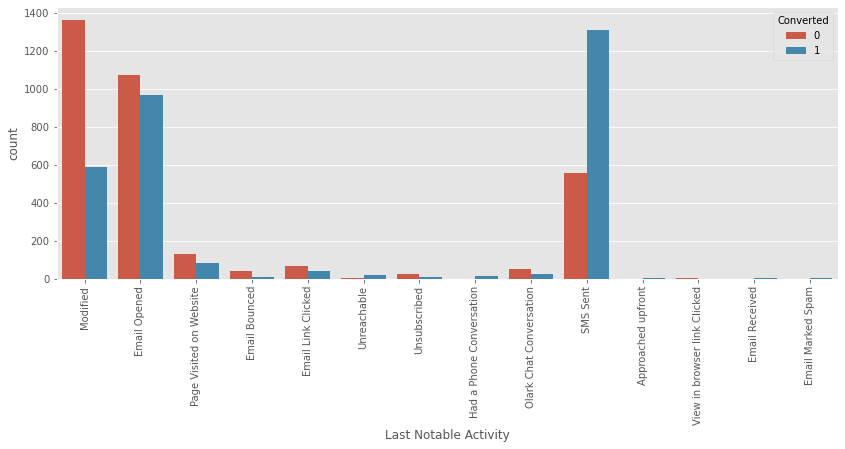

In [138]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [139]:
### list of columns to be dropped
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [140]:
#dropping columns
df = df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               6372 non-null   object 
 1   Lead Number                               6372 non-null   int64  
 2   Lead Origin                               6372 non-null   object 
 3   Lead Source                               6372 non-null   object 
 4   Do Not Email                              6372 non-null   object 
 5   Converted                                 6372 non-null   int64  
 6   TotalVisits                               6372 non-null   float64
 7   Total Time Spent on Website               6372 non-null   int64  
 8   Page Views Per Visit                      6372 non-null   float64
 9   Last Activity                             6372 non-null   object 
 10  Specialization                      

In [141]:
### Numerical Attributes Analysis

In [ ]:
#Check the % of Data that has Converted Values = 1:

In [142]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

48.10106716886378

In [143]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [ ]:
#### heatmap

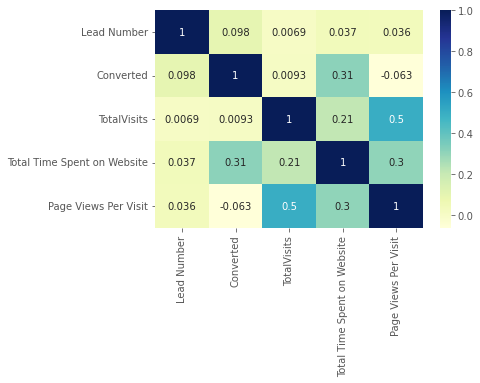

In [144]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Total Visits & visualizing spread of variable

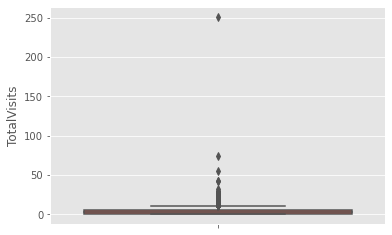

In [145]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [146]:
# In the above plot we can see presence of outliers here.

In [ ]:
### checking percentile values for "Total Visits"

In [147]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6372.000000
mean        3.606717
std         4.852274
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.290000
max       251.000000
Name: TotalVisits, dtype: float64

In [148]:
### Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

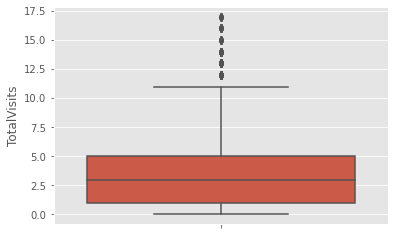

In [149]:
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [151]:
df.shape

(6308, 29)

In [152]:
#  Checking for the Next Numerical Column:
#  #checking percentiles for "Total Time Spent on Website"    

In [153]:
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6308.000000
mean      533.747939
std       565.050050
min         0.000000
5%          0.000000
25%        32.000000
50%       285.500000
75%      1021.000000
90%      1425.000000
95%      1591.650000
99%      1848.860000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

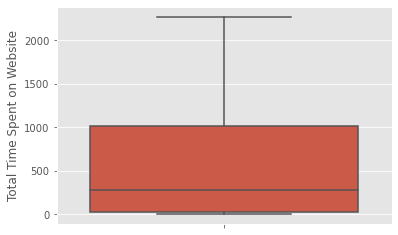

In [154]:
###  visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

In [155]:
# no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [156]:
## Checking for Page Views Per Visit

In [157]:
df['Page Views Per Visit'].describe()

count    6308.000000
mean        2.452941
std         2.045289
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        16.000000
Name: Page Views Per Visit, dtype: float64

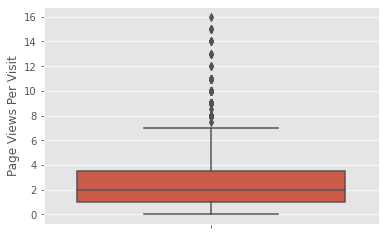

In [158]:
### visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

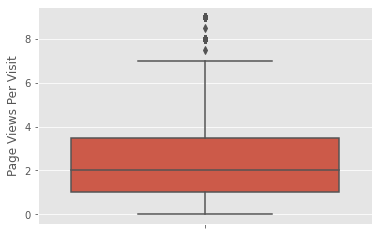

In [159]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [160]:
df.shape

(6263, 29)

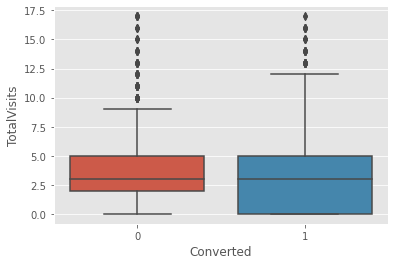

In [161]:
###  checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

In [162]:
##comments:
# Median for converted and not converted leads are the close.
# Nothng conclusive can be said on the basis of Total Visits

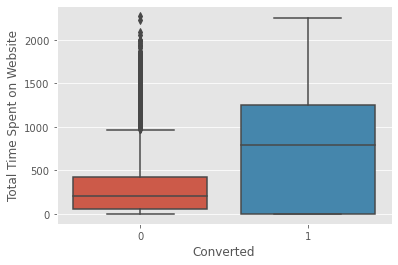

In [164]:
### checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

In [165]:
# comments
# Leads spending more time on the website are more likely to be converted.
# Website should be made more engaging to make leads spend more time.

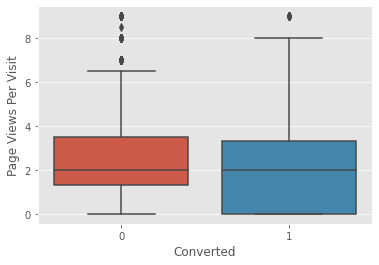

In [166]:
### checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

In [167]:
#comments
# Median for converted and unconverted leads is the same.
# Nothing can be said specifically for lead conversion from Page Views Per Visit

In [168]:
#checking missing values in leftover columns/
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
How did you hear about X Education          0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [169]:
## There are no missing values in the columns to be analyzed further

In [170]:
### Dummy Variable Creation

In [173]:
#getting a list of categorical columns
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [174]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

In [175]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [176]:
# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [177]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)

In [178]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.0
1,660728,0,5.0,674,2.5
2,660727,1,2.0,1532,2.0
3,660719,0,1.0,305,1.0
4,660681,1,2.0,1428,1.0


In [180]:
## Train-Test Split & Logistic Regression Model Building

In [181]:
## # Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [182]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [183]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4384 entries, 3177 to 8369
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  4384 non-null   int64  
 1   TotalVisits                  4384 non-null   float64
 2   Total Time Spent on Website  4384 non-null   int64  
 3   Page Views Per Visit         4384 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 171.2 KB


In [184]:
## Scaling of Data
#scaling numeric columns

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3177,0.574151,0.234025,0.691922,-0.209885
169,1.828800,-0.106601,-0.266133,-0.471619
3549,0.440563,0.234025,1.195788,0.837054
9140,-1.543977,-0.447227,-0.739839,-0.209885
2994,0.640407,1.255903,-0.486131,2.407463


In [206]:
### Observation
# Observation:
# After running the model on the Test Data these are the figures we obtain:

#Accuracy : 92.78%
#Sensitivity : 91.98%
#Specificity : 93.26%

In [207]:
# Final observation

In [208]:
#Train Data: ¶
#Accuracy : 92.29%
#Sensitivity : 91.70%
#Specificity : 92.66%


In [ ]:
#Test Data: ¶
#Accuracy : 92.78%
#Sensitivity : 91.98%
